# Semi-Supervised Human Activity Recognition (HAR)

## Data importing and preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

base_path = "C:/Users/chand/Downloads/capstonechan/human+activity+recognition+using+smartphones/UCI HAR Dataset/Dataset/"


### Import Required Libraries and Set Dataset Path

In this step, I imported the essential Python libraries used throughout the project:

- **pandas**: For data loading and manipulation
- **numpy**: For numerical operations
- **seaborn** and **matplotlib.pyplot**: For data visualization

I also define the `base_path` variable, which holds the file path to the Human Activity Recognition (HAR) dataset. This makes it easier to load multiple files from the dataset directory in subsequent steps without repeating the path each time.


In [ ]:
features = pd.read_csv(base_path + "features.txt", sep=r"\s+", header=None, names=["index", "feature"])
feature_names = features["feature"].tolist()
def make_unique(names):
    seen = {}
    new_names = []
    for name in names:
        if name not in seen:
            seen[name] = 0
            new_names.append(name)
        else:
            seen[name] += 1
            new_names.append(f"{name}_{seen[name]}")
    return new_names

feature_names = make_unique(feature_names)


### Load and Process Feature Names

In this step, i loaded the list of feature names from the `features.txt` file, which contains the names of the 561 signals measured by the smartphone’s accelerometer and gyroscope.

- `features.txt` is read into a DataFrame with two columns: an index and the feature name.
- `feature_names` is extracted as a list of all feature names.

However, the original list of features contains **duplicate names**, which can cause column naming conflicts in the dataset. To resolve this:

- I defined a helper function `make_unique()` that scans the list of names.
- If a name has already been seen, it appends an underscore and a counter to make it unique (e.g., `tBodyAcc-mean()-X`, `tBodyAcc-mean()-X_1`, etc.).

This ensures all feature names used as column headers are **unique** and prevent ambiguity during data processing.


In [5]:
#Training dataset
X_train = pd.read_csv(base_path + "train/X_train.txt", sep=r"\s+", header=None, names=feature_names)
y_train = pd.read_csv(base_path + "train/y_train.txt", sep=r"\s+", header=None, names=["Activity"])
subject_train = pd.read_csv(base_path + "train/subject_train.txt", header=None, names=["Subject"])
train_data = pd.concat([subject_train, y_train, X_train], axis=1)
#Test dataset
X_test = pd.read_csv(base_path + "test/X_test.txt", sep=r"\s+", header=None, names=feature_names)
y_test = pd.read_csv(base_path + "test/y_test.txt", sep=r"\s+", header=None, names=["Activity"])
subject_test = pd.read_csv(base_path + "test/subject_test.txt", header=None, names=["Subject"])
test_data = pd.concat([subject_test, y_test, X_test], axis=1)


### Load the Training and Testing Data

In this step, i loaded both the training and testing datasets from the Human Activity Recognition (HAR) dataset.

#### Data Files Loaded:
- `X_train.txt`: Contains the 561 feature values for each training observation.
- `y_train.txt`: Contains the activity labels (1 to 6) for the training data.
- `subject_train.txt`: Contains the subject ID (1 to 30) for each training observation.

Similarly, for the test set:
- `X_test.txt`: Feature values for the test observations.
- `y_test.txt`: Activity labels for test data.
- `subject_test.txt`: Subject IDs for test observations.

#### Data Construction:
- After loading, i used `pd.concat()` to horizontally merge the subject, activity, and features into a single DataFrame (`train_data` and `test_data`) for both the training and testing datasets.
- Column names for features are provided using the previously cleaned and unique `feature_names` list.

This prepares both the training and testing datasets in a structured format, where each row contains:
1. The `Subject` ID
2. The `Activity` label (to be mapped later)
3. 561 sensor signal features


In [7]:
#combining Dataset
full_data = pd.concat([train_data, test_data], axis=0).reset_index(drop=True)
#Mapping Lables 
activity_labels = {
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
}
full_data["Activity"] = full_data["Activity"].map(activity_labels)
print("Full dataset shape:", full_data.shape)
print("Memory usage (MB):", round(full_data.memory_usage().sum() / (1024**2), 2))
print("Activities:", full_data['Activity'].unique())
print("Subjects:", full_data['Subject'].nunique())

Full dataset shape: (10299, 563)
Memory usage (MB): 44.24
Activities: ['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']
Subjects: 30


### Step 3: Combine Training and Testing Sets

In this step, I merged the training and testing datasets into a single unified DataFrame called `full_data`. This helps streamline further analysis and visualization by working with one consolidated dataset.

#### Combining Data:
- `train_data` and `test_data` are vertically stacked using `pd.concat()`, and the index is reset for consistency.
- The resulting DataFrame, `full_data`, includes all observations (rows) and features (columns) from both sets.

####  Mapping Activity Labels:
- The activity labels in the original dataset are numeric (1 to 6). To improve interpretability, I mapped these numbers to their corresponding activity names:
  - 1 → WALKING  
  - 2 → WALKING_UPSTAIRS  
  - 3 → WALKING_DOWNSTAIRS  
  - 4 → SITTING  
  - 5 → STANDING  
  - 6 → LAYING

####  Summary Output:
- **Full dataset shape:** `(10299, 563)` — This includes 10299 observations and 561 features, plus the `Subject` and `Activity` columns.
- **Memory usage:** ~44.24 MB
- **Activity labels:** `['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']`
- **Unique subjects:** `30` — The data was collected from 30 different individuals.

This unified, labeled dataset will be used for EDA (Exploratory Data Analysis), dimensionality reduction, and machine learning model training in the subsequent steps.


In [44]:

print("Missing values:", full_data.isnull().sum().sum())



Missing values: 0


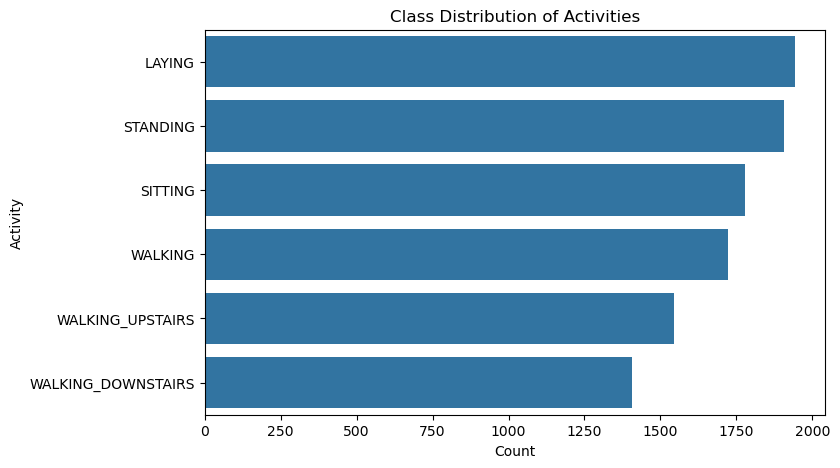

In [11]:
#class distribution
plt.figure(figsize=(8,5))
sns.countplot(y=full_data["Activity"], order=full_data["Activity"].value_counts().index)
plt.title("Class Distribution of Activities")
plt.xlabel("Count")
plt.ylabel("Activity")
plt.show()


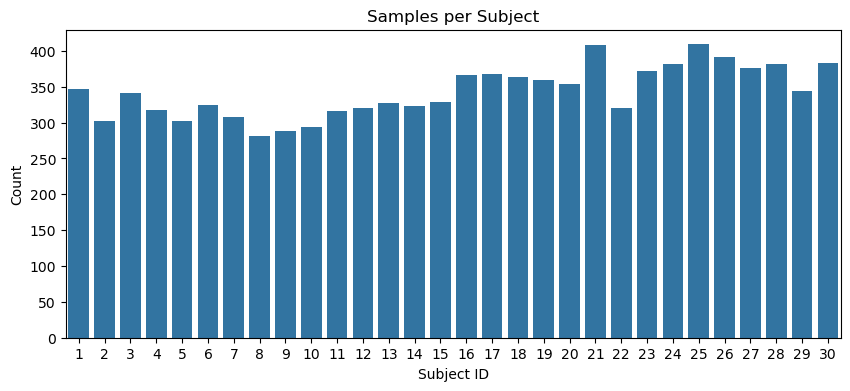

In [13]:
#subject distribution
plt.figure(figsize=(10,4))
sns.countplot(x=full_data["Subject"])
plt.title("Samples per Subject")
plt.xlabel("Subject ID")
plt.ylabel("Count")
plt.show()


In [15]:
#Feature summary
X_features = full_data.drop(columns=["Subject", "Activity"])
display(X_features.describe().T.head(10))


,count,mean,std,min,25%,50%,75%,max
tBodyAcc-mean()-X,10299.0,0.274347,0.067628,-1.0,0.262625,0.277174,0.288354,1.0
tBodyAcc-mean()-Y,10299.0,-0.017743,0.037128,-1.0,-0.024902,-0.017162,-0.010625,1.0
tBodyAcc-mean()-Z,10299.0,-0.108925,0.053033,-1.0,-0.121019,-0.108596,-0.097589,1.0
tBodyAcc-std()-X,10299.0,-0.607784,0.438694,-1.0,-0.992360,-0.943030,-0.250293,1.0
tBodyAcc-std()-Y,10299.0,-0.510191,0.500240,-1.0,-0.976990,-0.835032,-0.057336,1.0
tBodyAcc-std()-Z,10299.0,-0.613064,0.403657,-1.0,-0.979137,-0.850773,-0.278737,1.0
tBodyAcc-mad()-X,10299.0,-0.633593,0.413333,-1.0,-0.993293,-0.948244,-0.302033,1.0
tBodyAcc-mad()-Y,10299.0,-0.525697,0.484201,-1.0,-0.977017,-0.843670,-0.087405,1.0
tBodyAcc-mad()-Z,10299.0,-0.614989,0.399034,-1.0,-0.979064,-0.845068,-0.288149,1.0
tBodyAcc-max()-X,10299.0,-0.466732,0.538707,-1.0,-0.935788,-0.874825,-0.014641,1.0


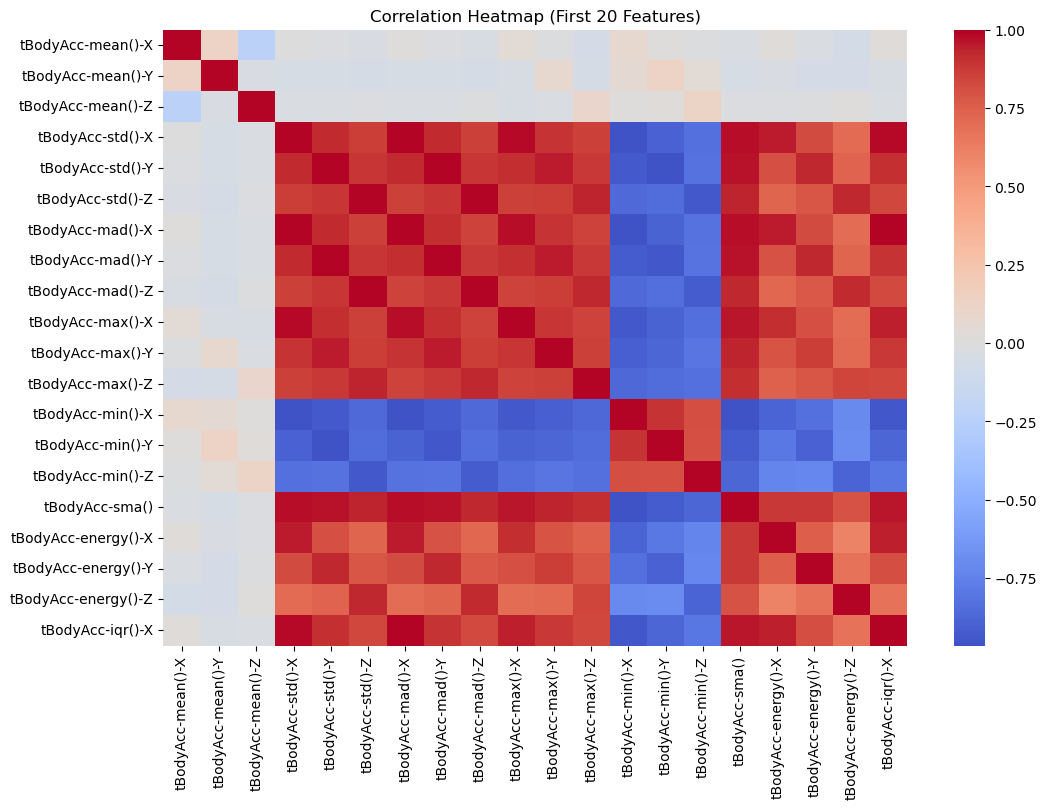

In [17]:
#Correlation heatmap
subset = X_features.iloc[:, :20]
plt.figure(figsize=(12,8))
sns.heatmap(subset.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (First 20 Features)")
plt.show()


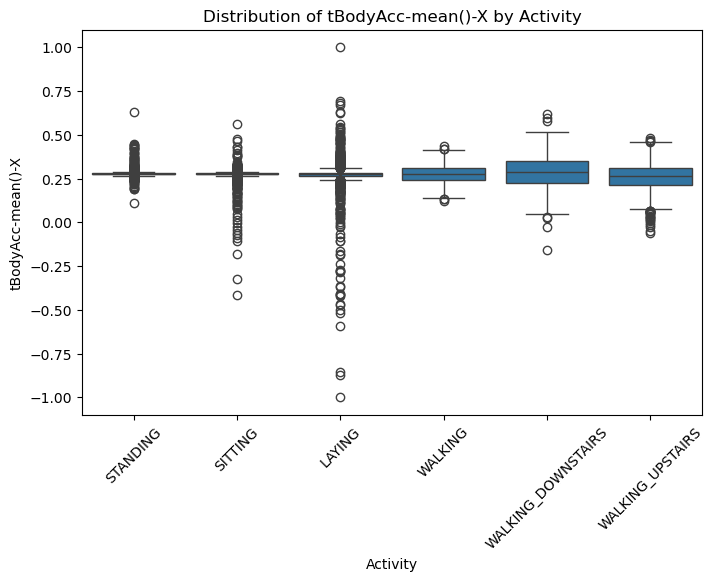

In [19]:
feature_example = "tBodyAcc-mean()-X"

plt.figure(figsize=(8,5))
sns.boxplot(x=full_data["Activity"], y=full_data[feature_example])
plt.title(f"Distribution of {feature_example} by Activity")
plt.xticks(rotation=45)
plt.show()


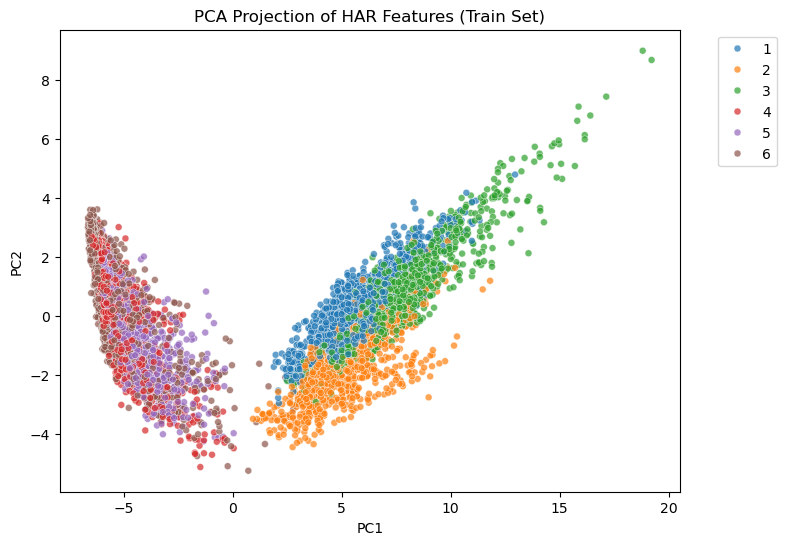

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# PCA transformation
pca = PCA(n_components=2)
X_proj = pca.fit_transform(X_train)

# Create a dataframe for plotting
pca_df = pd.DataFrame({
    "PC1": X_proj[:, 0],
    "PC2": X_proj[:, 1],
    "Activity": y_train["Activity"]
})

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Activity", palette="tab10", s=25, alpha=0.7)
plt.title("PCA Projection of HAR Features (Train Set)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


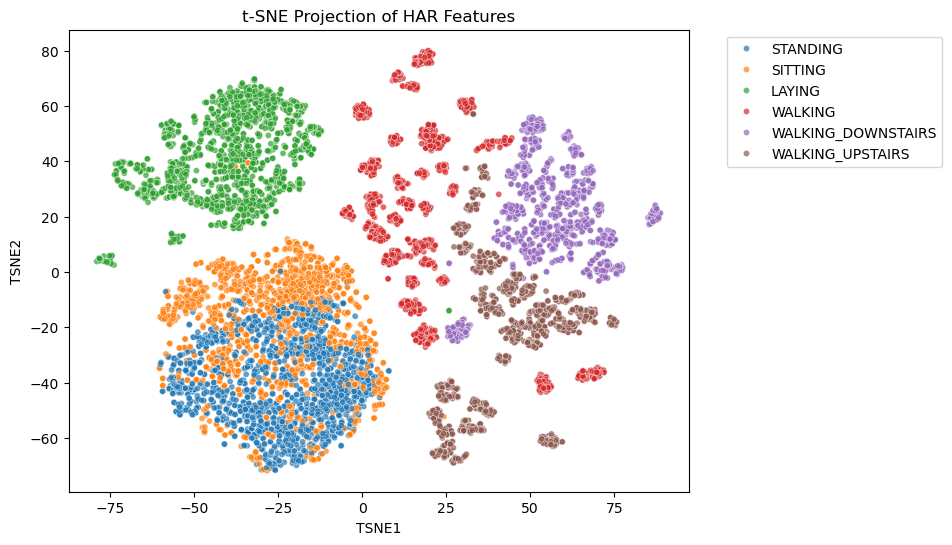

In [25]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Run t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_train)
y_train_labeled = y_train["Activity"].map(activity_labels)

# Build DataFrame
tsne_df = pd.DataFrame({
    "TSNE1": X_tsne[:, 0],
    "TSNE2": X_tsne[:, 1],
    "Activity": y_train_labeled
})

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=tsne_df, x="TSNE1", y="TSNE2", hue="Activity", palette="tab10", s=20, alpha=0.7)
plt.title("t-SNE Projection of HAR Features")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [29]:
import numpy as np
import pandas as pd

# Setting random seed for reproducibility
np.random.seed(42)
total_samples = len(y_train)
n_labeled = int(total_samples * 0.05)
# Creating a copy of labels to mask
y_train_semi = y_train.copy()
# Randomly selecting indices to keep labeled
labeled_indices = np.random.choice(total_samples, n_labeled, replace=False)
# Masking everything except the labeled indices
y_train_semi.loc[~y_train_semi.index.isin(labeled_indices), 'Activity'] = -1
n_masked = (y_train_semi['Activity'] == -1).sum()
n_unmasked = (y_train_semi['Activity'] != -1).sum()

print("Total labels:", total_samples)
print("Masked labels (unlabeled):", n_masked)
print("Unmasked labels (labeled):", n_unmasked)


Total labels: 7352
Masked labels (unlabeled): 6985
Unmasked labels (labeled): 367


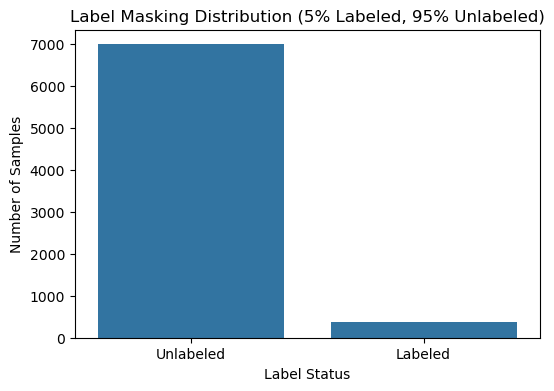

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
label_status = y_train_semi['Activity'].apply(lambda x: 'Labeled' if x != -1 else 'Unlabeled')

# Plotting the counts
plt.figure(figsize=(6,4))
sns.countplot(x=label_status)
plt.title("Label Masking Distribution")
plt.ylabel("Number of Samples")
plt.xlabel("Label Status")
plt.show()
